In [2]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Preprocess the data
    
    -Deal with NAs

    -Convert some strings to factors


In [6]:
from plotnine import ggplot, aes, geom_line, geom_histogram

In [7]:
train['Age'].isnull().sum()

177

In [8]:
train = train[train['Age'].notna()]

d:\python\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


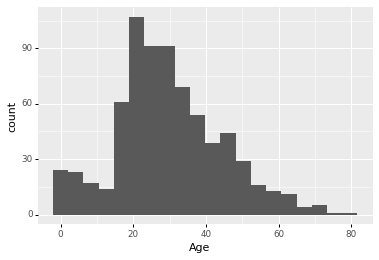

<ggplot: (180057092075)>

In [9]:
(
    ggplot(train) + 
    aes(x = train['Age'])+
    geom_histogram()
)

Age is normally distributed.

# Initial Model: Sex, class, age, fare

In [10]:
# Logistic regression of surival on sex class age fare
# Create dummy variables for sex and class


In [11]:
class_dummies = pd.get_dummies(train['Pclass'])
gender_dummies = pd.get_dummies(train['Sex'])
train = pd.concat([train, gender_dummies, class_dummies], axis = 1)
train = train.drop(['Sex', 'male', 1], axis = 1)


Split the training data into training and validation 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = ['Age', 'female', 2 , 3, 'Fare']
X = train[X]
Y = train['Survived']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [15]:
model_logit = LogisticRegression().fit(X_train, Y_train)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


In [16]:
model_logit.score(X_train, Y_train)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


0.8073555166374781

# Evaluate model on test set

In [17]:
y_pred_logit = model_logit.predict(X_test)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


In [18]:
y_pred_logit.size

143

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error

In [25]:
mean_absolute_error(y_pred_logit, Y_test)

0.24475524475524477

In [26]:
accuracy_score(Y_test, y_pred_logit)

0.7552447552447552

In [27]:
print(classification_report(Y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        87
           1       0.68      0.70      0.69        56

    accuracy                           0.76       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.76      0.76      0.76       143



# Decision tree

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
Y_train

328    1
73     0
253    0
719    0
666    0
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 571, dtype: int64

In [30]:
model_dtree = DecisionTreeRegressor(random_state = 1)

In [31]:
model_dtree.fit(X_train, Y_train)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


DecisionTreeRegressor(random_state=1)

In [32]:
# Make test preds
test_preds = model_dtree.predict(X_test)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


In [33]:
test_mae_dtree = mean_absolute_error(test_preds, Y_test)

In [34]:
test_mae_dtree

0.2937062937062937

In [35]:
def get_mae(max_leaf_nodes, X_train, X_test, Y_train, Y_test):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 0)
    model.fit(X_train, Y_train)
    preds_test = model.predict(X_test)
    mae = mean_absolute_error(Y_test, preds_test)
    return(mae)

In [36]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 150, 200]

scores = {leaf_size : get_mae(leaf_size, X_train, X_test, Y_train, Y_test) for 
    leaf_size in candidate_max_leaf_nodes}

best_tree_size = min(scores, key = scores.get)


d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with d

In [37]:
print("The optimal tree size is", best_tree_size)


The optimal tree size is 50


In [38]:
# Final model
final_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 1)

In [39]:
final_model.fit(X, Y)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)

In [40]:
final_test_preds = final_model.predict(X)



d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


In [41]:
mean_absolute_error(final_test_preds, Y)

0.1544934582879536

In [42]:
# 0.15 accuracy on the full data. Compare 50 nodes to logistic reg 

# On test.csv

In [43]:
val = pd.read_csv('test.csv')

In [44]:
class_dummies = pd.get_dummies(test['Pclass'])
gender_dummies = pd.get_dummies(test['Sex'])
test = pd.concat([test, gender_dummies, class_dummies], axis = 1)
test = test.drop(['Sex', 'male', 1], axis = 1)

In [45]:
test_features = ['Age', 'Fare', 'female', 2, 3]
test_X = test[test_features]

In [46]:
test_X = test_X[test_X['Age'].notna()]
test_X = test_X[test_X['Fare'].notna()]

In [47]:
final_val_preds = final_model.predict(test_X)

d:\python\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


In [49]:
test_X['Survived'] = 

KeyError: 'Survived'